# Wine Quality Dataset

This is one of the most popular datasets along data science beginners. It is divided into 2 datasets. You can perform both regression and classification tasks on this data. It will test your understanding in different fields – outlier detection, feature selection, and unbalanced data. There are 4898 rows and 12 columns in this dataset.

In [3]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../../hand_made_stuff')
from handmadestuff import fit_predict_report
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

#Read files:
red = pd.read_csv("data/winequality-red.csv", sep=';')
white = pd.read_csv("data/winequality-white.csv", sep=';')

In [4]:
red['variant'] = 0
white['variant'] = 1
data = pd.concat([red, white], ignore_index=True, sort=False)

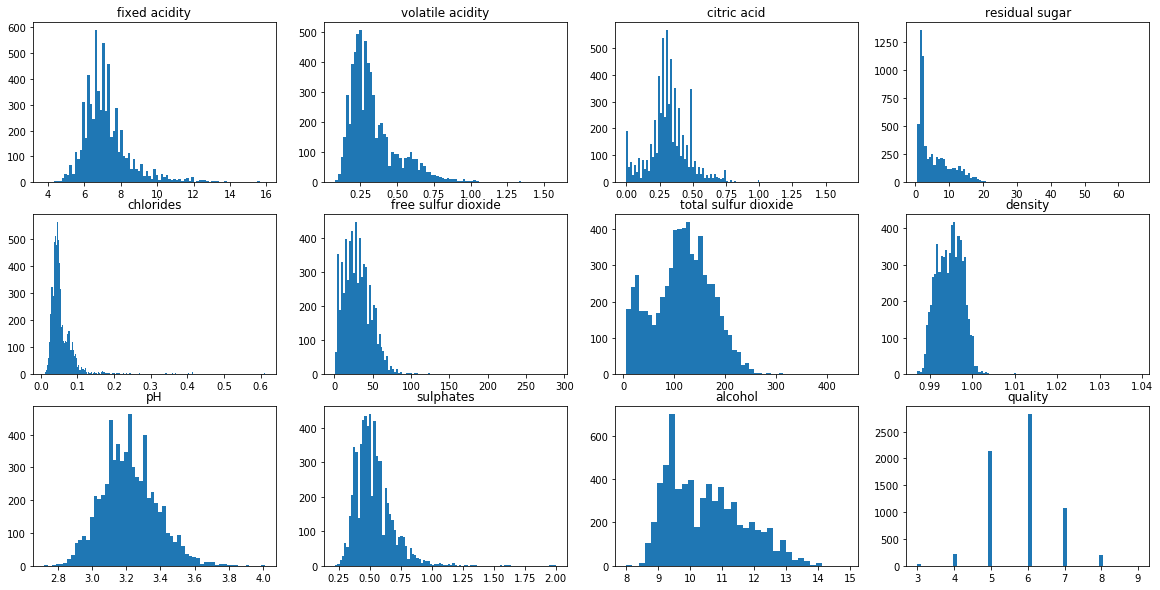

In [54]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 10)

for i in range(1, len(data.iloc[0] - 1)):
    plt.subplot(3, 4, i).hist(data.iloc[:, i - 1], bins='auto')
    plt.title(data.columns[i - 1])

In [3]:
# Displaying the data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,variant
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [4]:
# Counting an amount of missing values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
variant                 0
dtype: int64

In [5]:
# nice :)

In [6]:
# Lets look at some basic statistics
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,variant
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [7]:
# Splitting the dataset into the source and the target values
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [8]:
# Splitting the dataset into the train and the test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
fit_predict_report(data, 'knn', X_train, y_train, X_test, y_test, n_neighbors = 10)

Classificator used:
 knn


Confusion matrix: 

 [[ 321   63]
 [  41 1200]] 


Classification report:

              precision    recall  f1-score   support

          0       0.89      0.84      0.86       384
          1       0.95      0.97      0.96      1241

avg / total       0.94      0.94      0.94      1625



In [10]:
fit_predict_report(data, 'svc', X_train, y_train, X_test, y_test)

Classificator used:
 svc


Confusion matrix: 

 [[ 325   59]
 [  22 1219]] 


Classification report:

              precision    recall  f1-score   support

          0       0.94      0.85      0.89       384
          1       0.95      0.98      0.97      1241

avg / total       0.95      0.95      0.95      1625



In [11]:
fit_predict_report(data, 'lr', X_train, y_train, X_test, y_test)

Classificator used:
 lr


Confusion matrix: 

 [[ 363   21]
 [  18 1223]] 


Classification report:

              precision    recall  f1-score   support

          0       0.95      0.95      0.95       384
          1       0.98      0.99      0.98      1241

avg / total       0.98      0.98      0.98      1625



In [12]:
fit_predict_report(data, 'rf', X_train, y_train, X_test, y_test)

Classificator used:
 rf


Confusion matrix: 

 [[ 373   11]
 [   4 1237]] 


Classification report:

              precision    recall  f1-score   support

          0       0.99      0.97      0.98       384
          1       0.99      1.00      0.99      1241

avg / total       0.99      0.99      0.99      1625



In [13]:
fit_predict_report(data, 'nb', X_train, y_train, X_test, y_test)

Classificator used:
 nb


Confusion matrix: 

 [[ 372   12]
 [  48 1193]] 


Classification report:

              precision    recall  f1-score   support

          0       0.89      0.97      0.93       384
          1       0.99      0.96      0.98      1241

avg / total       0.97      0.96      0.96      1625

